In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
import itertools

In [2]:
df=pd.read_csv('product j.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [3]:
df.head(15)

,Product Name,Product Category,Month,Year,Sales,Market Size,Marketing Expense,Month No.
Month-Year,,,,,,,,
2019-01-01,Product J,Cough Suppressant,January,2019,63722,238469,164221,1
2019-02-01,Product J,Cough Suppressant,February,2019,76987,288111,198407,2
2019-03-01,Product J,Cough Suppressant,March,2019,99645,372905,256800,3
2019-04-01,Product J,Cough Suppressant,April,2019,68529,256458,176610,4
2019-05-01,Product J,Cough Suppressant,May,2019,45119,168850,116279,5
2019-06-01,Product J,Cough Suppressant,June,2019,39059,146172,100661,6
2019-07-01,Product J,Cough Suppressant,July,2019,36898,138085,95092,7
2019-08-01,Product J,Cough Suppressant,August,2019,45234,169281,116575,8
2019-09-01,Product J,Cough Suppressant,September,2019,56459,211288,145504,9


In [4]:
sales_j= df.drop(['Product Name','Product Category','Month','Year','Month No.'],axis=1)

In [5]:
sales_j.shape

(60, 3)

In [6]:
sales_j.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Sales              60 non-null     int64
 1   Market Size        60 non-null     int64
 2   Marketing Expense  60 non-null     int64
dtypes: int64(3)
memory usage: 1.9 KB


In [7]:
print('Total Sales:', sales_j['Sales'].sum())
print('Total Market Size:',sales_j['Market Size'].sum())
print('Total Marketing Expense:', sales_j['Marketing Expense'].sum())

Total Sales: 4532957
Total Market Size: 15875623
Total Marketing Expense: 13689118


Text(0.5, 1.0, 'Product J')

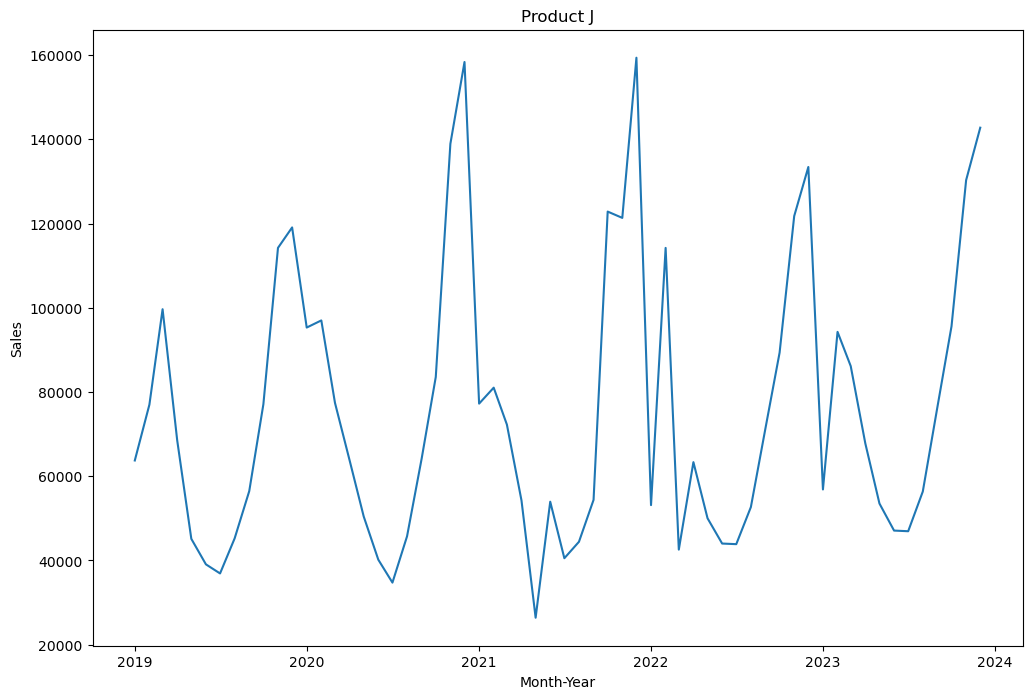

In [8]:
plt.figure(figsize=(12,8))
sns.lineplot(sales_j['Sales'])
plt.title('Product J')

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [11]:
adf_test(sales_j['Sales'])

ADF Statistics: -2.3759301997991913
p- value: 0.14864548261740318
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [12]:
sales_j_diff= sales_j['Sales'].diff().dropna()

Text(0.5, 1.0, 'Product J - First Difference')

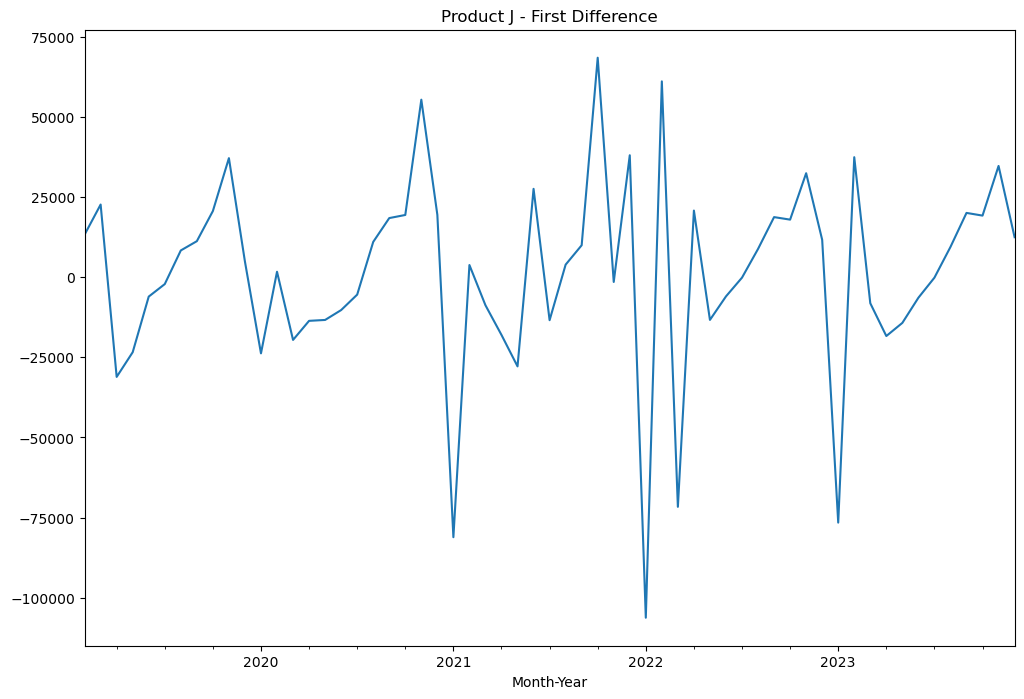

In [13]:
sales_j_diff.plot(figsize=(12,8))
plt.title('Product J - First Difference')

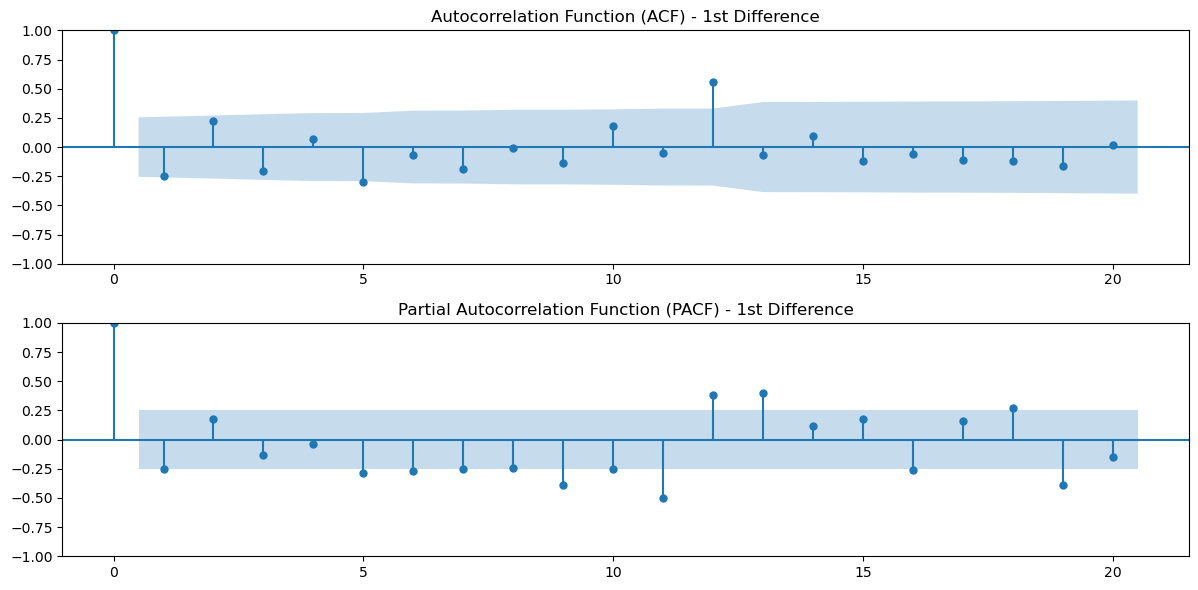

In [14]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_j_diff, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - 1st Difference')

plt.subplot(212)
plot_pacf(sales_j_diff, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - 1st Difference')

plt.tight_layout()
plt.show()

In [15]:
adf_test(sales_j_diff)

ADF Statistics: -6.410493361286657
p- value: 1.896152982571653e-08
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [16]:
train= sales_j[:54]
test=sales_j[54:]

In [17]:
len(train)

54

In [18]:
#Finding the best value for ARIMA

#import itertools
#p=d=q=range(0,5)
#pdq = list(itertools.product(p,d,q))

#for param in pdq:
#    try:
#        model_arima = ARIMA(train,order=param)
#        model_arima_fit = model_arima.fit()
#       print(param,model_arima_fit.aic)
#    except:
#        continue
    
# The Akaike information criterion (AIC) is an estimator of in-sample prediction error and thereby relative quality of
# statistical models for a given set of data

# It's like the mean squared error in Regression - The smaller the number, the better

In [19]:
#therefore, the combination p=(0,1,2,3,4,5) d=1 q=(0,1,2,3) must be tested with accuracy metrics and aic

In [20]:
#param = [(0,1,0),(0,1,1),(0,1,2),(0,1,3),(1,1,0),(1,1,1),(1,1,2),(1,1,3),(2,1,0), (2,1,1), (2,1,2),(2,1,3),(3,1,0),(3,1,1),(3,1,2),(3,1,3),(4,1,0),(4,1,1),(4,1,2),(4,1,3),(5,1,0),(5,1,1),(5,1,2),(5,1,3)]

#for p in param:  # Changed 'x' to 'p'
#    model = ARIMA(train, order=p).fit()
#    pred = model.forecast(steps=len(test))
#    mae = mean_absolute_error(test, pred)
#    mape = np.mean(np.abs((test - pred) / test)) * 100
#    mse=mean_squared_error(test, pred)
#    rmse = np.sqrt(mean_squared_error(test, pred))
#    print(p)
#    print(f'MAE: {mae}')
#    print(f'MSE: {mse}')
#    print(f'RMSE: {rmse}')
#    print('A.I.C:', model.aic)

In [21]:
order=[]
for p in range(6):
    # Loop over MA order
    for q in range(3):
        # Fit model        
#       model= ARIMA(sales_b, order=(p,1,q))
        model_t = ARIMA(train['Sales'], order=(p,1,q), exog=train[['Market Size','Marketing Expense']])
        model_test=model_t.fit() 
        pred=model_test.predict(start=len(train), end=(len(sales_j)-1), exog=test[['Market Size','Marketing Expense']])
        mae = mean_absolute_error(test['Sales'], pred)
        mape = np.mean(np.abs((test['Sales'] - pred) / test)) * 100
        mse=mean_squared_error(test['Sales'], pred)
        rmse = np.sqrt(mean_squared_error(test['Sales'], pred))
        # Add order and scores to list        
        order.append((p, q, model_test.aic, model_test.bic,mae, mse, rmse))
#Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order, columns=['p','q', 'aic', 'bic', 'mae','mse', 'rmse'])

In [22]:
# Sort by AIC
print(order_df.sort_values('aic'))

    p  q          aic          bic           mae           mse          rmse
1   0  1  1208.089553  1215.970721  21839.110534  6.622924e+08  25735.042706
4   1  1  1210.053003  1219.904463  21695.940937  6.560542e+08  25613.555037
7   2  1  1210.929641  1222.751392  23842.419705  7.620212e+08  27604.731588
2   0  2  1211.430709  1221.282168  21600.560922  6.516909e+08  25528.237412
5   1  2  1212.773897  1224.595649  22032.702981  6.734759e+08  25951.414409
10  3  1  1212.912934  1226.704977  23743.192416  7.605761e+08  27578.543296
8   2  2  1214.034114  1227.826158  23679.064100  7.581391e+08  27534.325479
13  4  1  1215.155084  1230.917420  24167.358699  7.773184e+08  27880.430214
11  3  2  1215.715956  1231.478292  23793.267056  7.635880e+08  27633.096147
16  5  1  1216.975105  1234.707732  24488.003455  7.783189e+08  27898.366774
14  4  2  1217.401427  1235.134055  23763.294284  7.610889e+08  27587.840165
9   3  0  1218.536899  1230.358651  15433.566229  5.851258e+08  24189.373691

In [23]:
m_arima= ARIMA(train['Sales'], order=(0,1,1), exog=train[['Market Size','Marketing Expense']])
model_arima=m_arima.fit()
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   54
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -600.045
Date:                Thu, 09 May 2024   AIC                           1208.090
Time:                        19:13:44   BIC                           1215.971
Sample:                    01-01-2019   HQIC                          1211.120
                         - 06-01-2023                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Market Size           0.2377      0.056      4.230      0.000       0.128       0.348
Marketing Expense     0.0069      0.071      0.097      0.923      -0.132       0.146
ma.L1                -0.

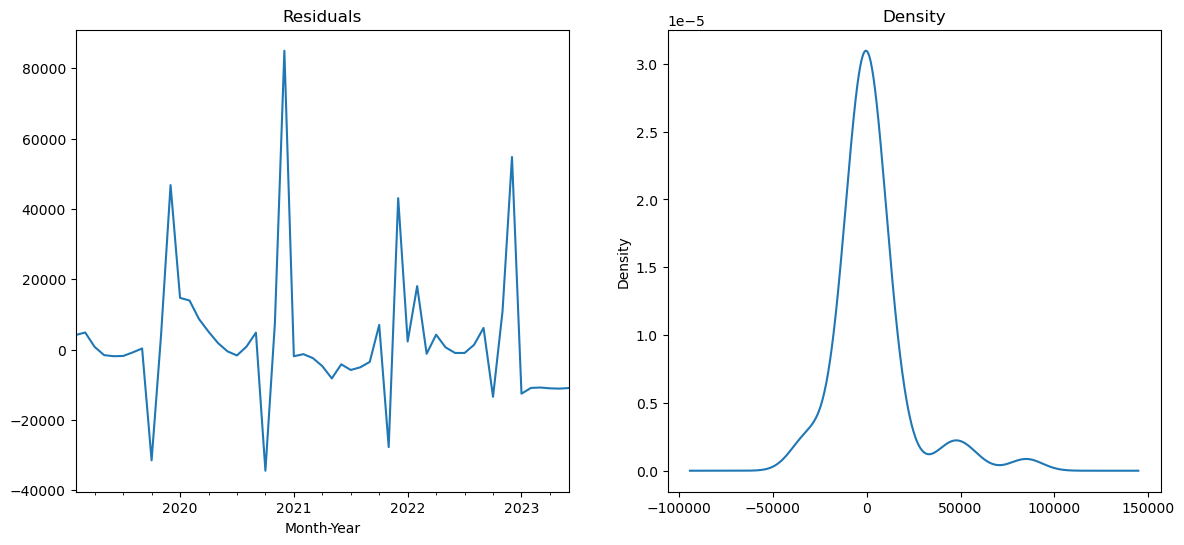

In [24]:
residuals= model_arima.resid[1:]
fig,ax=plt.subplots(1,2, figsize=(14, 6))
residuals.plot(title='Residuals',ax=ax[0])
residuals.plot(title='Density',kind='kde',ax=ax[1])
plt.show()

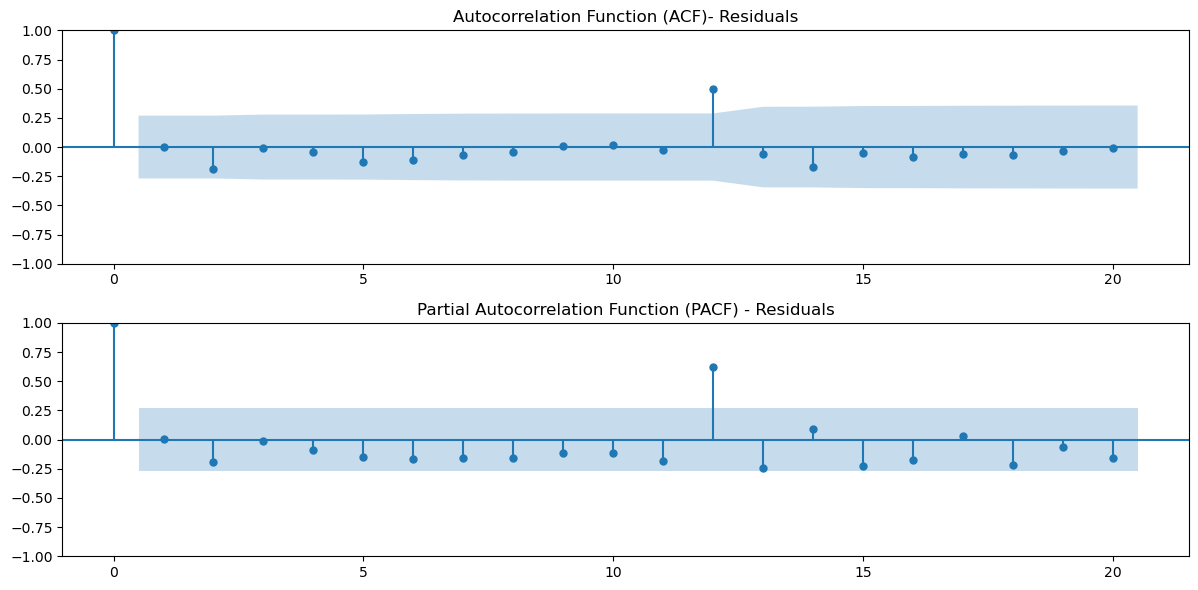

In [25]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)- Residuals')

plt.subplot(212)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Residuals')

plt.tight_layout()
plt.show()

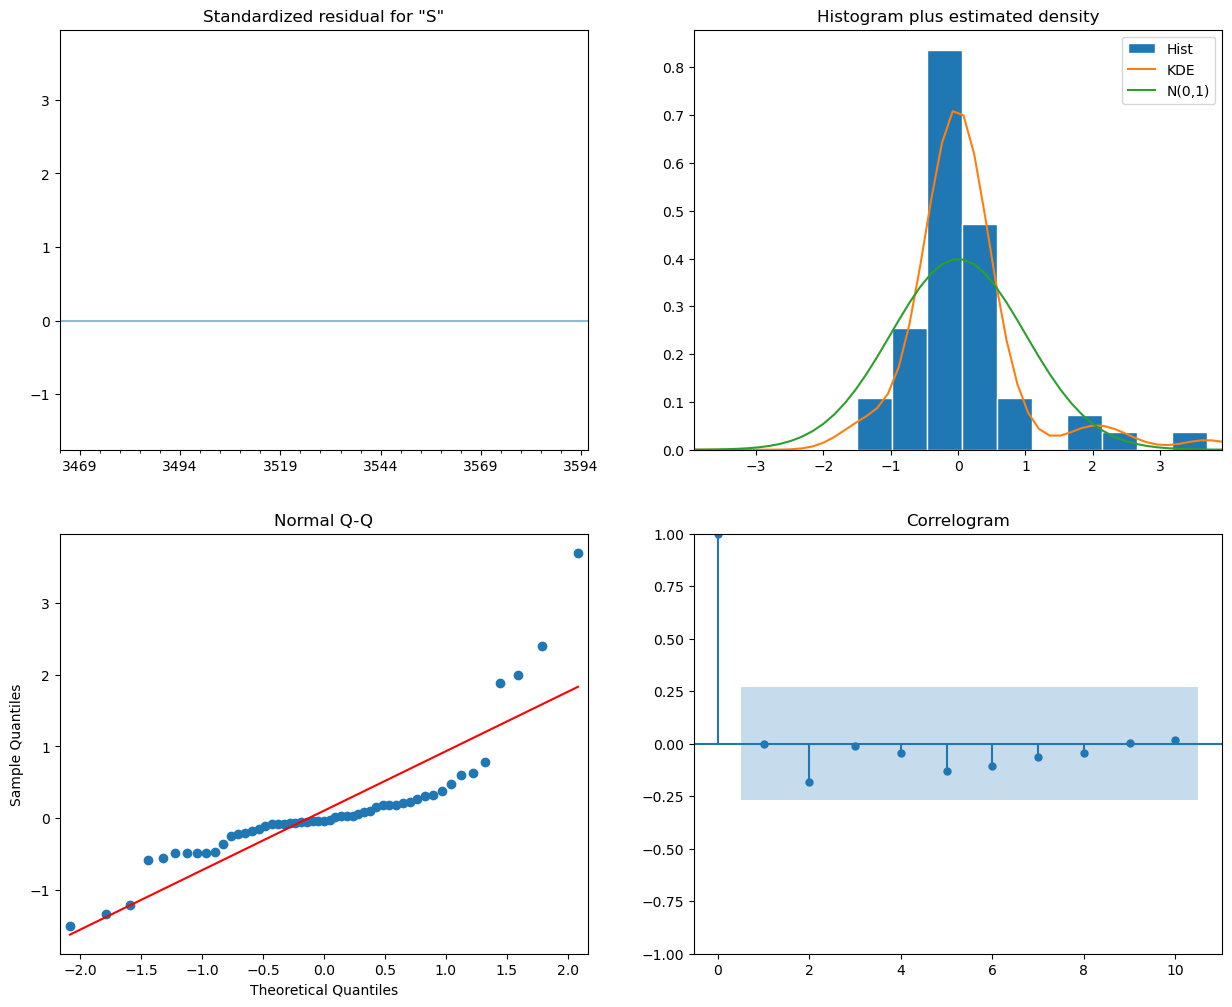

In [26]:
# Create the 4 diagostics plots
model_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [27]:
#pred_in_sample = model_arima.get_prediction(start=len(train), end=(len(sales_b)-1))
#sales_b['Forecast_ARIMA_p']=[None]*len(train) + list(pred)

In [28]:
#plt.figure(figsize=(12, 8))
#sns.lineplot(sales_b[['Sales','Forecast_ARIMA_p']])
#plt.title('Product B')
#plt.show()

In [29]:
pred=model_arima.predict(start=len(train), end=(len(sales_j)-1), exog=test[['Market Size','Marketing Expense']], dynamic = True)
sales_j['Forecast_ARIMAX']=[None]*len(train) + list(pred)
#sales_b.plot()

In [30]:
#pred=model_arima.forecast(steps= len(test))
#sales_b['Forecast_ARIMA']=[None]*len(train) + list(pred)
#sales_b.plot()

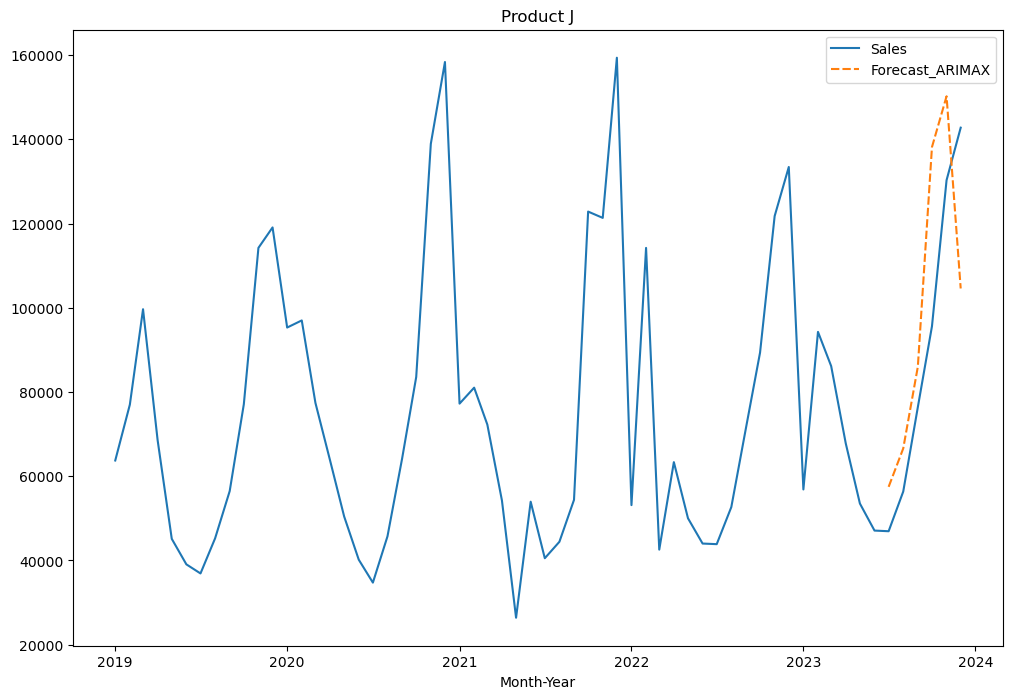

In [31]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_j[['Sales','Forecast_ARIMAX']])
plt.title('Product J')
plt.show()

In [32]:
mae_arimax= mean_absolute_error(test['Sales'],pred)
mse_arimax=mean_squared_error(test['Sales'], pred)
mape_arimax= mean_absolute_percentage_error(test['Sales'],pred)
rmse_arimax= np.sqrt(mean_squared_error(test['Sales'],pred))

print(f'MAE - ARIMAX: {mae_arimax}')
print(f'MAPE - ARIMAX: {mape_arimax}')
print(f'MSE - ARIMAX: {mse_arimax}')
print(f'RMSE - ARIMAX: {rmse_arimax}')

MAE - ARIMAX: 21839.110533539584
MAPE - ARIMAX: 0.2329137374126854
MSE - ARIMAX: 662292423.0753683
RMSE - ARIMAX: 25735.04270591693


# SARIMA

In [33]:
import statsmodels.api as sm

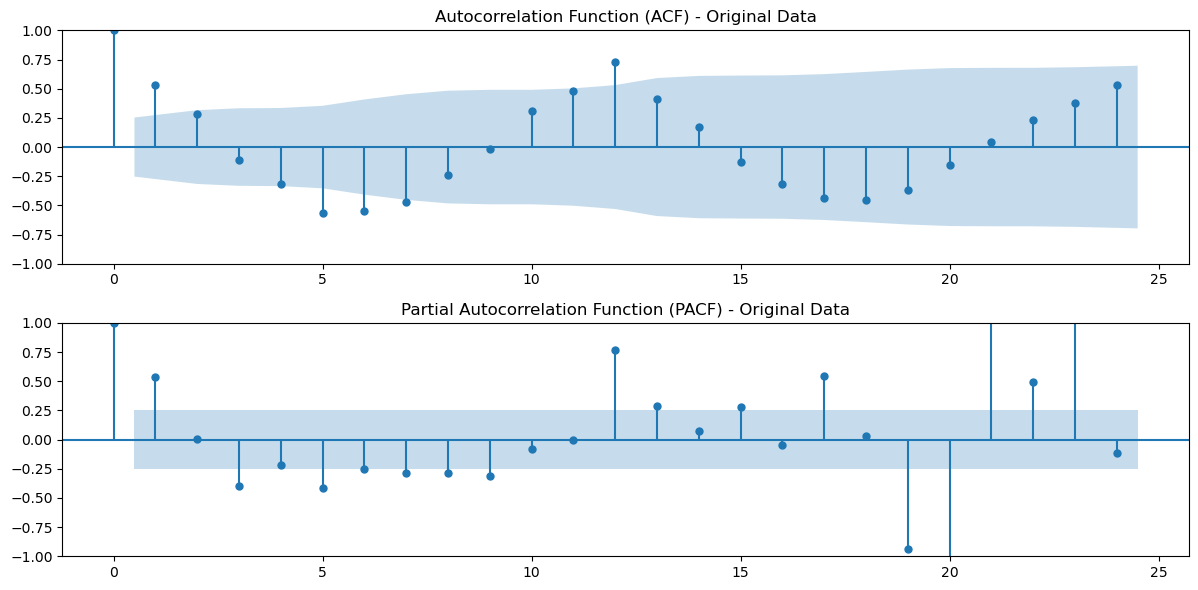

In [34]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_j['Sales'], lags=24, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Original Data')

plt.subplot(212)
plot_pacf(sales_j['Sales'], lags=24, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Original Data')

plt.tight_layout()
plt.show()

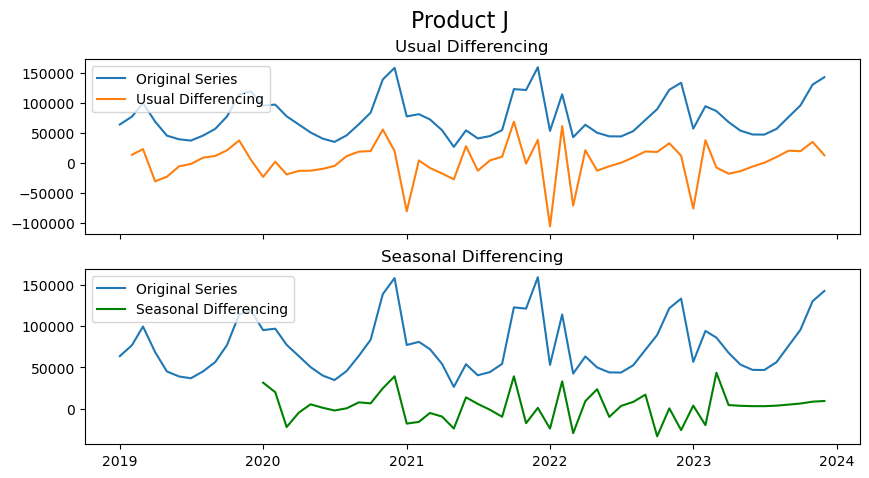

In [35]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(sales_j['Sales'], label='Original Series')
axes[0].plot(sales_j['Sales'].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(sales_j['Sales'], label='Original Series')
axes[1].plot(sales_j['Sales'].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Product J', fontsize=16)
plt.show()

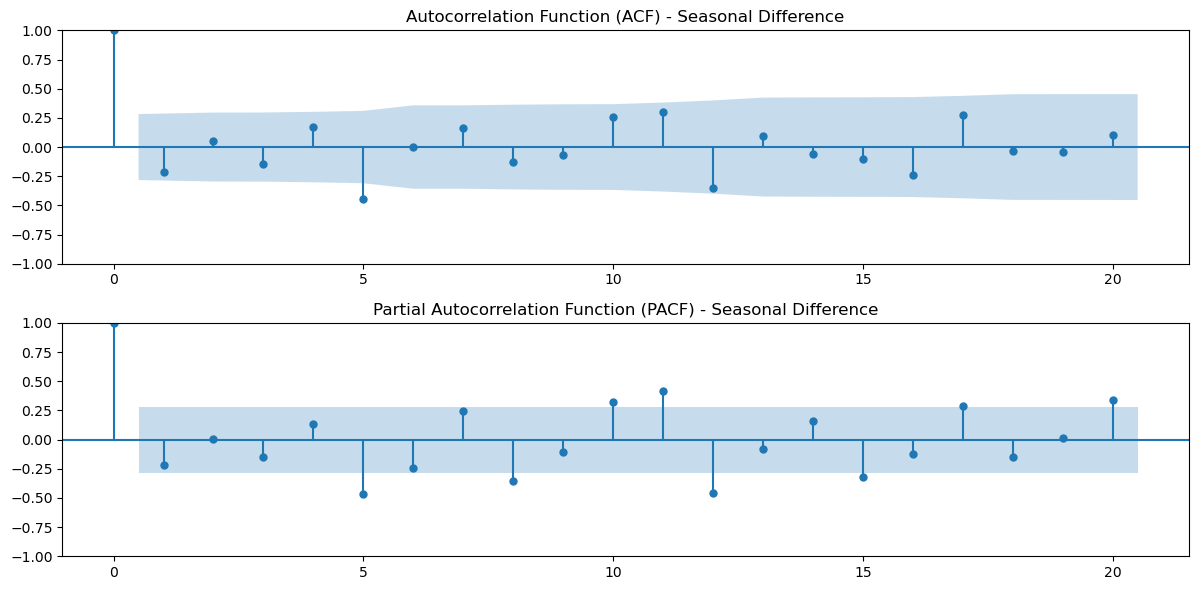

In [36]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_j['Sales'].diff(12).dropna(), lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Seasonal Difference')

plt.subplot(212)
plot_pacf(sales_j['Sales'].diff(12).dropna(), lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Seasonal Difference')

plt.tight_layout()
plt.show()

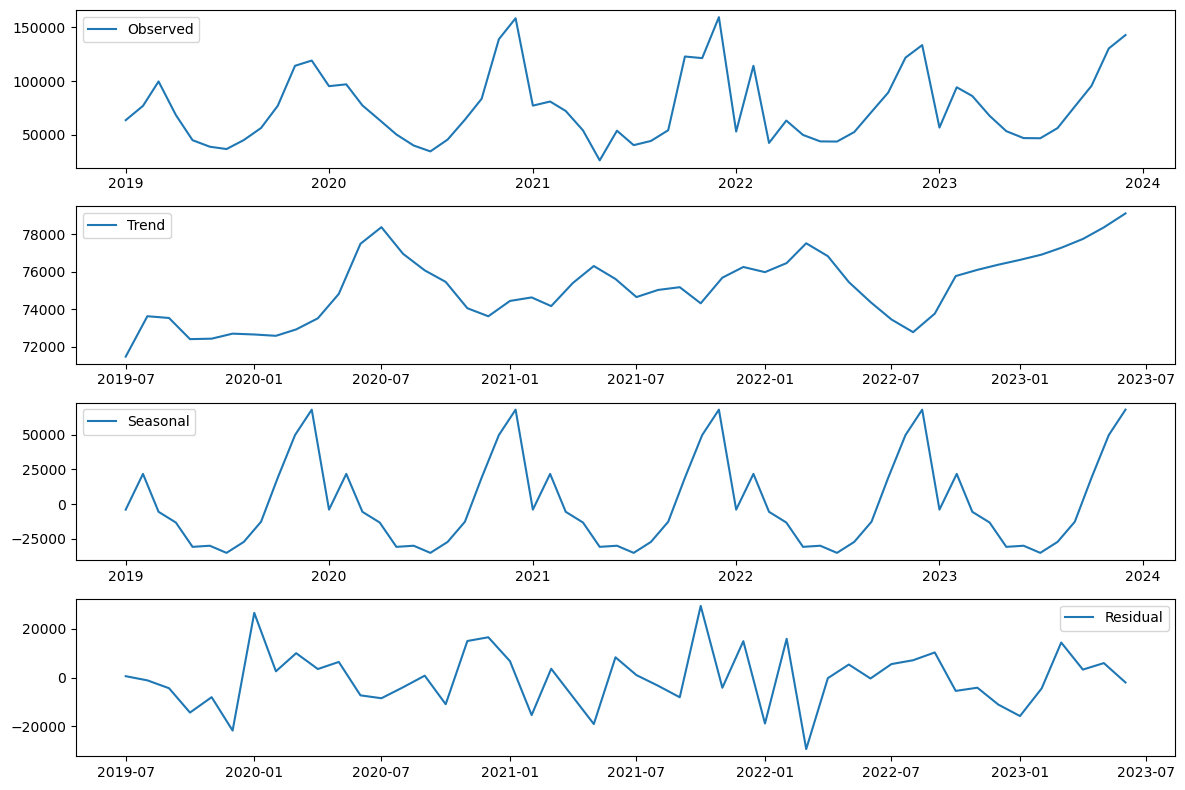

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(sales_j['Sales'], model='additive', period=12)

# Plot the decomposition
#fig = decomposition.plot(figsize=(12,8))
#plt.show()
# Create a new figure with the specified size
plt.figure(figsize=(12, 8))

# Plot each component separately
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [38]:
order_SARIMAX=[]
# Loop over P order
for P in range(6):
    # Loop over Q order
    for Q in range(2):
        # Fit model
        model_s = sm.tsa.statespace.SARIMAX(train['Sales'], order=(0, 1, 1), seasonal_order=(P, 1, Q, 12),exog=train[['Market Size','Marketing Expense']])
        model_test_s = model_s.fit() 
        pred = model_test_s.predict(start=54, end=59, dynamic=True, exog=test[['Market Size','Marketing Expense']])
        mae = mean_absolute_error(test['Sales'], pred)
        mse = mean_squared_error(test['Sales'], pred)
        # Add order and scores to list        
        order_SARIMAX.append((P, Q, model_test_s.aic, model_test_s.bic, mae, mse))

# Make DataFrame of model order and scores
order_SARIMAX_df = pd.DataFrame(order_SARIMAX, columns=['P', 'Q', 'aic', 'bic', 'mae', 'mse'])


In [39]:
# Sort by AIC
print(order_SARIMAX_df.sort_values('aic'))

    P  Q         aic         bic           mae           mse
1   0  1  920.501028  929.068889  13072.962954  2.285168e+08
2   1  0  921.881075  930.448936  12858.967896  2.617995e+08
4   2  0  922.024251  932.305684  12498.359305  1.956386e+08
3   1  1  922.496876  932.778308  13061.295324  2.269614e+08
0   0  0  923.249889  930.104178  12613.715172  2.090061e+08
6   3  0  923.905849  935.900853  12122.596387  1.939573e+08
5   2  1  923.949946  935.944951  12220.413947  1.915482e+08
8   4  0  925.860845  939.569422  12207.965346  2.058839e+08
7   3  1  925.872688  939.581265  12215.662685  2.032695e+08
10  5  0  927.860845  943.282994  12207.979704  2.058846e+08
9   4  1  927.862441  943.284589  12231.878873  2.066540e+08
11  5  1  929.860841  946.996561  12206.048309  2.058062e+08


In [40]:
sarima=sm.tsa.statespace.SARIMAX(train['Sales'],order=(0, 1, 1),seasonal_order=(0,1,1,12),exog=train[['Market Size','Marketing Expense']])
sarima_model=sarima.fit()
print(sarima_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   54
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -455.251
Date:                            Thu, 09 May 2024   AIC                            920.501
Time:                                    19:16:09   BIC                            929.069
Sample:                                01-01-2019   HQIC                           923.621
                                     - 06-01-2023                                         
Covariance Type:                              opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Market Size           0.2355      0.053      4.474      0.000       0.132       0.339
Marketing Expe

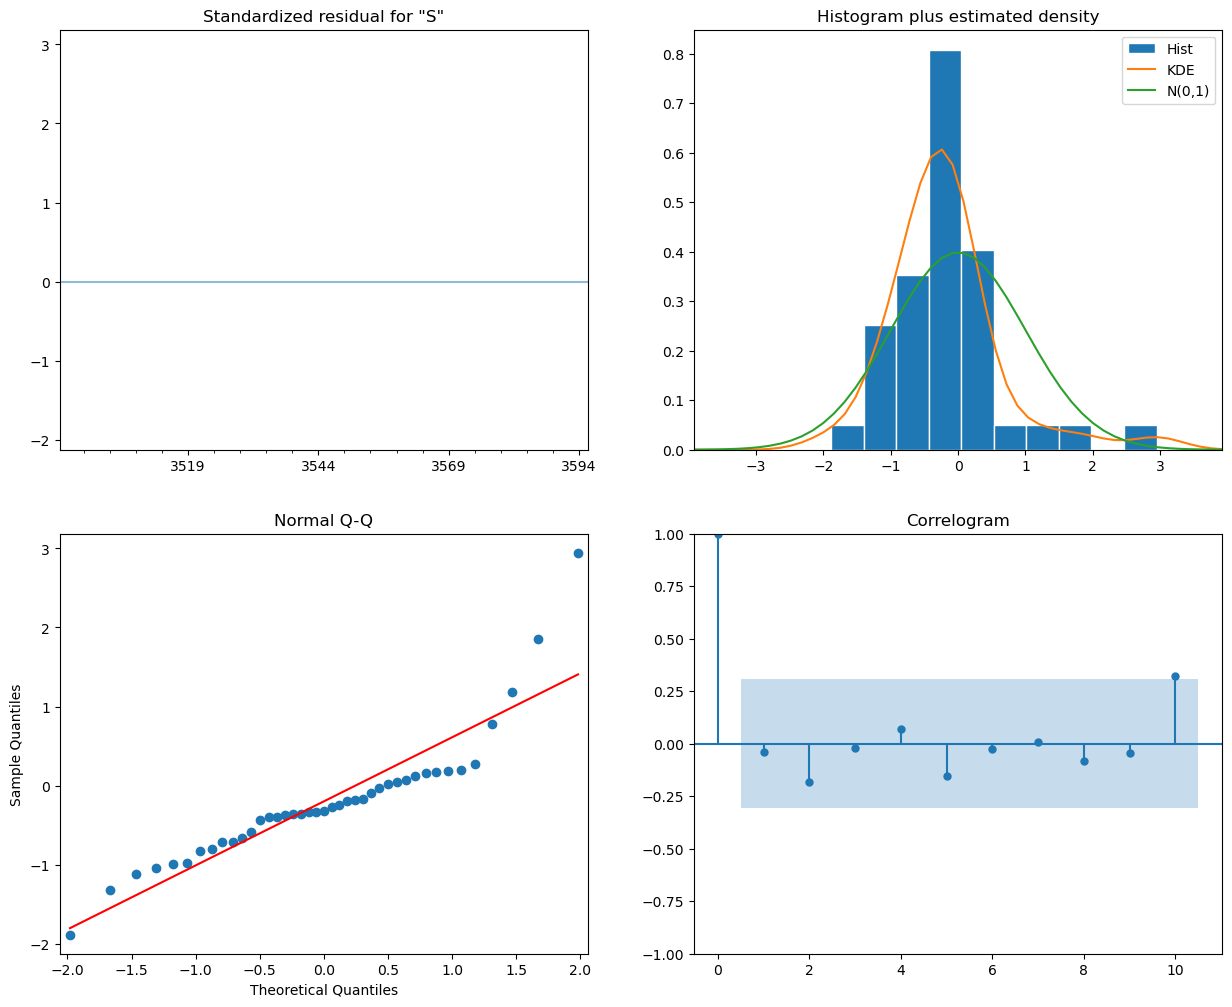

In [41]:
sarima_model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [42]:
forecast_test_sarima=sarima_model.predict(start=54, end=59, dynamic=True, exog=test[['Market Size','Marketing Expense']])

In [43]:
sales_j['Forecast_SARIMAX']=[None]*len(train)+ list(forecast_test_sarima)
#sales_b[['Sales','Forecast_SARIMA']].plot(figsize=(12,8))

Text(0.5, 1.0, 'Product J')

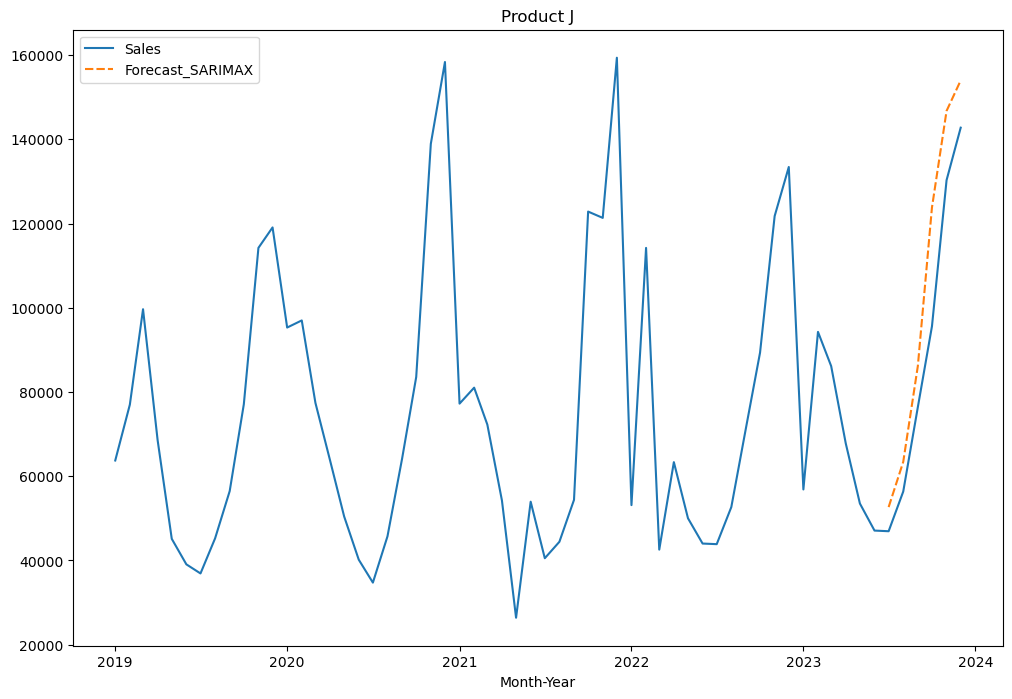

In [44]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_j[['Sales','Forecast_SARIMAX']])
plt.title('Product J')

In [45]:
mae_sarimax= mean_absolute_error(test['Sales'],forecast_test_sarima)
mape_sarimax= mean_absolute_percentage_error(test['Sales'],forecast_test_sarima)
mse_sarimax=mean_squared_error(test['Sales'], forecast_test_sarima)
rmse_sarimax= np.sqrt(mean_squared_error(test['Sales'],forecast_test_sarima))

print(f'MAE - SARIMAX: {round(mae_sarimax,3)}')
print(f'MAPE - SARIMAX: {round(mape_sarimax,3)}')
print(f'MSE - SARIMAX: {round(mse_sarimax,3)}')
print(f'RMSE - SARIMAX: {round(rmse_sarimax,3)}')

MAE - SARIMAX: 13072.963
MAPE - SARIMAX: 0.146
MSE - SARIMAX: 228516842.786
RMSE - SARIMAX: 15116.774


# AUTO-ARIMA

In [46]:
import pmdarima as pm

In [47]:
auto_arima= pm.auto_arima(train['Sales'], start_p=0, d=1, start_q=0, max_p=6,max_q=3,
                          start_P=0, D=1, start_Q=0, max_P=6 ,max_Q=2 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12, exogenous=train[['Market Size','Marketing Expense']])
auto_arima

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=965.053, Time=0.04 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=960.869, Time=0.27 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=962.775, Time=0.23 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=961.545, Time=0.09 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.75 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=964.284, Time=0.51 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=965.874, Time=0.30 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=1.61 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=965.141, Time=0.69 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=inf, Time=4.88 sec
 ARIMA(0,1,0)(3,1,1)[12]             : AIC=inf, Time=8.12 sec
 ARIMA(0,1,0)(3,1,2)[12]             : AIC=966.258, Time=3.27 sec
 ARIMA(0,1,0)(4,1,0)[12]             : AIC=964.685, Time=1.74 sec
 ARIMA(0,1,0)(4,1,1)[12]             : AIC=966.462, Time=4.21 sec
 ARIMA(0,1,0)(5,1,0)[12]             : AIC=966.685, Time=4.15 sec
 ARIMA(0,1,1)(0,1,0)[12]  

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [48]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   54
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -472.415
Date:                              Thu, 09 May 2024   AIC                            950.830
Time:                                      19:18:10   BIC                            955.971
Sample:                                  01-01-2019   HQIC                           952.702
                                       - 06-01-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4716      0.104     -4.514      0.000      -0.676      -0.267
ma.S.L12      -0.2656      0.089     -2.993      0.003      -0.440      -0.092
sigma2      5.665e+08   2.74e-11   2.07e+19      0.000    5.67e+08    5.67e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):                 0.62
Prob(Q):                              0.59   Prob(JB):                         0.74
Heteroskedasticity (H):               0.41   Skew:                            -0.27
Prob(H) (two-sided):                  0.11   Kurtosis:                         3.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.28e+34. Standard errors may be unstable.
"""

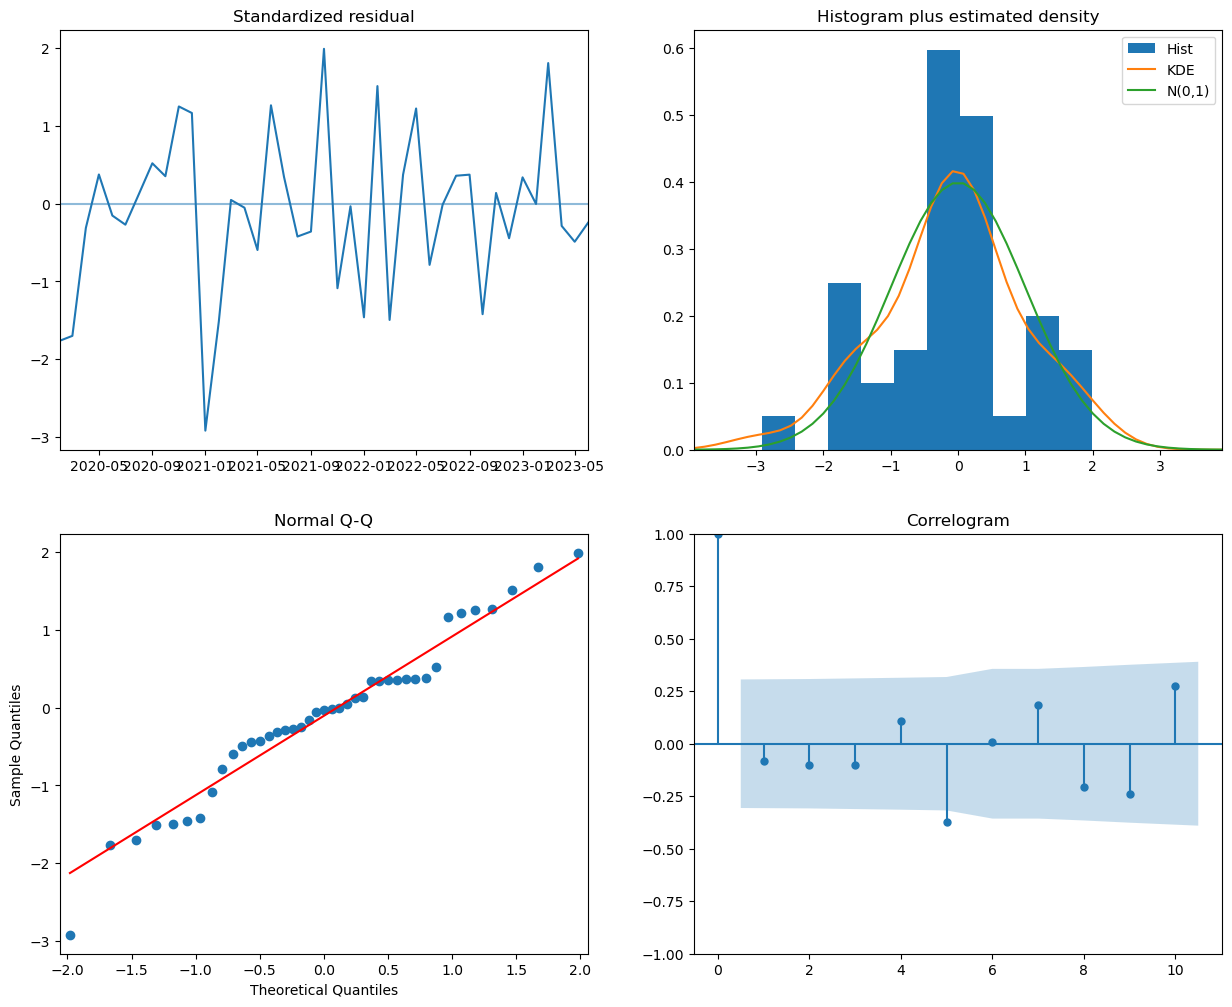

In [49]:
auto_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [50]:
forecast_test_auto= auto_arima.predict(n_periods=len(test), exogenous=test[['Market Size','Marketing Expense']])
sales_j['Forecast_AUTO ARIMAX']=[None]*len(train)+ list(forecast_test_auto)
#sales_b[['Sales','Forecast_AUTO ARIMA']].plot()

Text(0.5, 1.0, 'Product J')

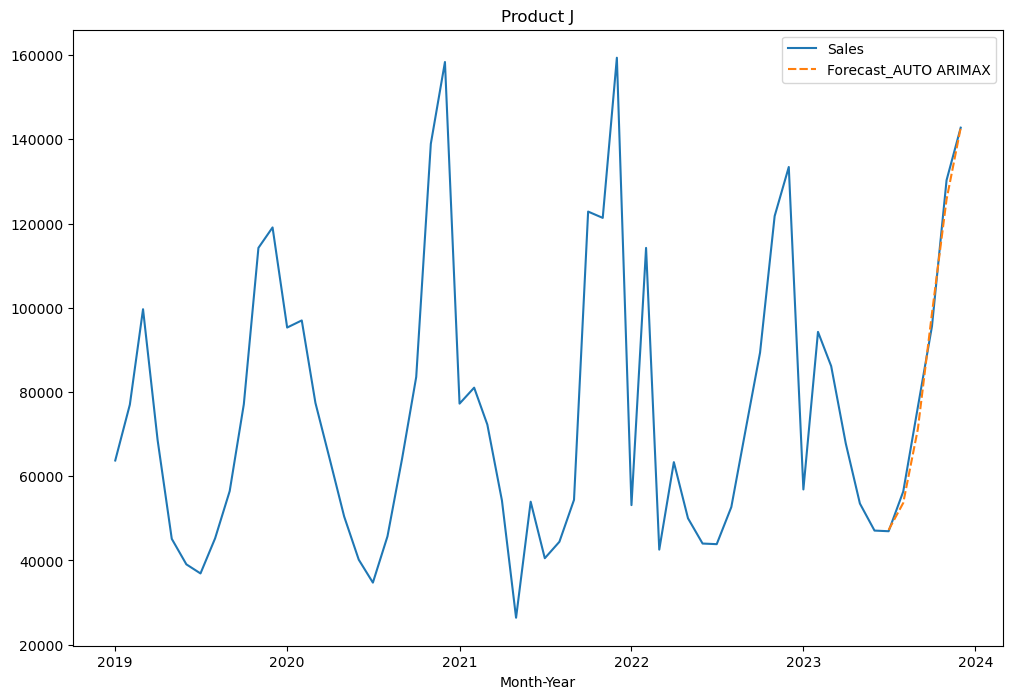

In [51]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_j[['Sales','Forecast_AUTO ARIMAX']])
plt.title('Product J')

In [52]:
mae_auto_arimax= mean_absolute_error(test['Sales'],forecast_test_auto)
mape_auto_arimax= mean_absolute_percentage_error(test['Sales'],forecast_test_auto)
mse_auto_arimax=mean_squared_error(test['Sales'],forecast_test_auto)
rmse_auto_arimax= np.sqrt(mean_squared_error(test['Sales'],forecast_test_auto))

print(f'MAE - AUTO ARIMAX: {mae_auto_arimax}')
print(f'MAPE - AUTO ARIMAX: {mape_auto_arimax}')
print(f'MSE - AUTO ARIMAX: {mse_auto_arimax}')
print(f'RMSE - AUTO ARIMAX: {rmse_auto_arimax}')

MAE - AUTO ARIMAX: 2649.1948063784766
MAPE - AUTO ARIMAX: 0.0317098256819767
MSE - AUTO ARIMAX: 10820042.924255539
RMSE - AUTO ARIMAX: 3289.3833653521656


In [53]:
sales_j.tail(12)

,Sales,Market Size,Marketing Expense,Forecast_ARIMAX,Forecast_SARIMAX,Forecast_AUTO ARIMAX
Month-Year,,,,,,
2023-01-01,56843,223425,276651,NaN,NaN,NaN
2023-02-01,94268,370526,458797,NaN,NaN,NaN
2023-03-01,86135,338559,419214,NaN,NaN,NaN
2023-04-01,67767,266362,329818,NaN,NaN,NaN
2023-05-01,53500,210285,260381,NaN,NaN,NaN
2023-06-01,47080,185051,229135,NaN,NaN,NaN
2023-07-01,46924,184438,228376,57466.804661,52658.022891,47233.610342
2023-08-01,56348,221479,274242,66587.175431,63402.021552,53646.685413
2023-09-01,76393,300267,371800,85986.637236,86143.555429,71168.132621


In [54]:
sales_j.mean()

Sales                    75549.283333
Market Size             264593.716667
Marketing Expense       228151.966667
Forecast_ARIMAX         100496.219129
Forecast_SARIMAX        104458.296287
Forecast_AUTO ARIMAX     89863.557505
dtype: float64

In [55]:
data = {
    'model': ['ARIMAX', 'AUTO ARIMAX', 'SEASONAL ARIMAX'],
    'MAE': [mae_arimax, mae_auto_arimax, mae_sarimax],  
    'MAPE': [mape_arimax, mape_auto_arimax, mape_sarimax],  
    'MSE': [mse_arimax, mse_auto_arimax, mse_sarimax],  
    'RMSE': [rmse_arimax, rmse_auto_arimax, rmse_sarimax]  
}

model_results = pd.DataFrame(data)
model_results.set_index('model', inplace=True)
model_results

,MAE,MAPE,MSE,RMSE
model,,,,
ARIMAX,21839.110534,0.232914,6.622924e+08,25735.042706
AUTO ARIMAX,2649.194806,0.031710,1.082004e+07,3289.383365
SEASONAL ARIMAX,13072.962954,0.145861,2.285168e+08,15116.773557


# TESTING

In [19]:
auto_arima_1= pm.auto_arima(train['Sales'], start_p=0, start_q=0, max_p=5,max_q=3,
                          start_P=0, start_Q=0, max_P=2 ,max_Q=2 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12, exogenous=train[['Market Size','Marketing Expense']])
auto_arima_1

 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=951.254, Time=0.05 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=952.941, Time=0.12 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=954.126, Time=0.33 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=952.993, Time=0.12 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=954.777, Time=0.29 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=1.09 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=953.888, Time=0.33 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.08 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=954.693, Time=1.26 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=953.463, Time=0.08 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=954.978, Time=0.21 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=956.187, Time=0.47 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=955.056, Time=0.15 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=956.809, Time=0.37 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=1.21 sec
 ARIMA(0,0,1)(2,1,0)[1

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True)

In [20]:
auto_arima_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                   54
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                -473.627
Date:                  Wed, 08 May 2024   AIC                            951.254
Time:                          20:23:17   BIC                            954.729
Sample:                      01-01-2019   HQIC                           952.528
                           - 06-01-2023                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1809.8571   3037.037      0.596      0.551   -4142.626    7762.340
sigma2      3.651e+08   9.22e+07      3.960      0.000    1.84e+08    5.46e+08
===================================================================================
Ljung-Box (L1) (Q):                   2.22   Jarque-Bera (JB):                 0.94
Prob(Q):                              0.14   Prob(JB):                         0.63
Heteroskedasticity (H):               1.13   Skew:                             0.30
Prob(H) (two-sided):                  0.83   Kurtosis:                         2.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
forecast_test_auto_1= auto_arima_1.predict(n_periods=len(test), exogenous=test[['Market Size','Marketing Expense']])
sales_j['Forecast_AUTO ARIMA_1']=[None]*len(train)+ list(forecast_test_auto_1)

Text(0.5, 1.0, 'Product J')

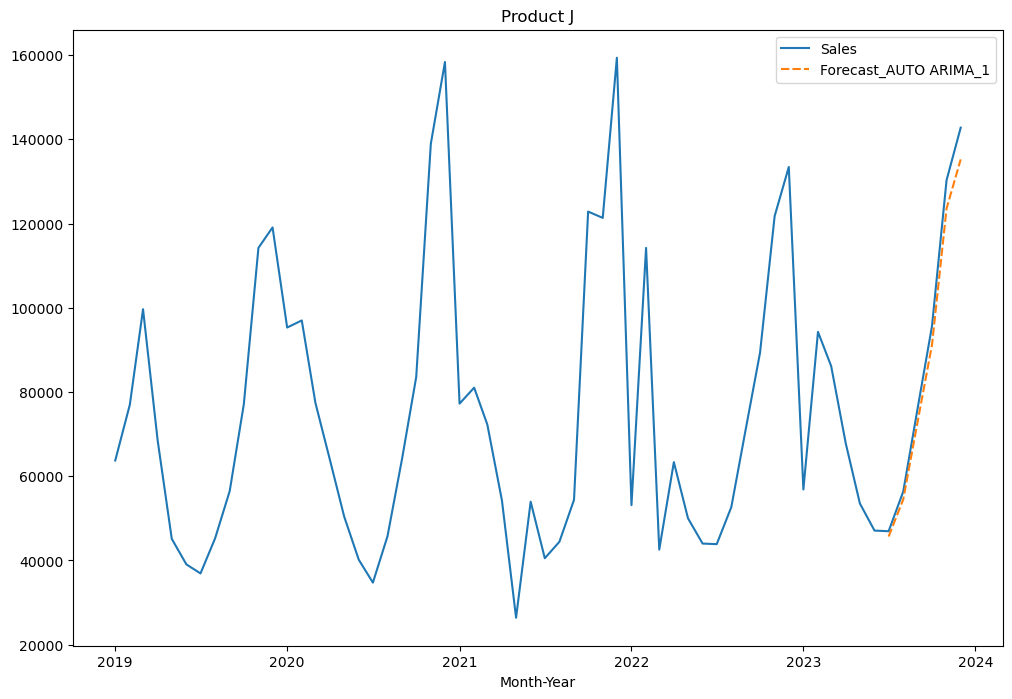

In [22]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_j[['Sales','Forecast_AUTO ARIMA_1']])
plt.title('Product J')

In [23]:
mae_auto_arima_1= mean_absolute_error(test['Sales'],forecast_test_auto_1)
mape_auto_arima_1= mean_absolute_percentage_error(test['Sales'],forecast_test_auto_1)
mse_auto_arima_1=mean_squared_error(test['Sales'],forecast_test_auto_1)
rmse_auto_arima_1= np.sqrt(mean_squared_error(test['Sales'],forecast_test_auto_1))

print(f'MAE - AUTO ARIMA: {mae_auto_arima_1}')
print(f'MAPE - AUTO ARIMA: {mape_auto_arima_1}')
print(f'MSE - AUTO ARIMA: {mse_auto_arima_1}')
print(f'RMSE - AUTO ARIMA: {rmse_auto_arima_1}')

MAE - AUTO ARIMA: 4168.476190476191
MAPE - AUTO ARIMA: 0.042105114896235966
MSE - AUTO ARIMA: 22797582.639455806
RMSE - AUTO ARIMA: 4774.681417587545
